In [166]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import seaborn as sns 

In [167]:
from google.colab import drive
drive.mount('/content/gdrive/')
data = pd.read_csv("/content/gdrive/MyDrive/NYC-sale-project/dataCollected.csv")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [168]:
df = data.copy()
df.head()

BOROUGH                      BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0        1  07 RENTALS - WALKUP APARTMENTS                                2A   
1        1  07 RENTALS - WALKUP APARTMENTS                                2B   
2        1  07 RENTALS - WALKUP APARTMENTS                                2A   
3        1  07 RENTALS - WALKUP APARTMENTS                                2B   
4        1  08 RENTALS - ELEVATOR APARTMENTS                               2   

  BUILDING CLASS AT PRESENT  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0                        C2                  5                 0            5   
1                        C4                 10                 0           10   
2                        C2                  6                 0            6   
3                        C4                  8                 0            8   
4                        D9                 24                 0           24   

   LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  TAX CLASS AT TIME OF SALE  \
0            1633.0             6440.0        1900                          2   
1            2272.0             6794.0        1913                          2   
2            2369.0             4615.0        1900                          2   
3            1750.0             4226.0        1920                          2   
4            4489.0            18523.0        1920                          2   

  BUILDING CLASS AT TIME OF SALE  SALE PRICE  LATITUDE  LONGITUDE  
0                             C2   6625000.0   40.7262   -73.9796  
1                             C4   3936272.0   40.7262   -73.9796  
2                             C2   8000000.0   40.7262   -73.9796  
3                             C4   3192840.0   40.7262   -73.9796  
4                             D9  16232000.0   40.7262   -73.9796

<ipython-input-169-753ca5bff919>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

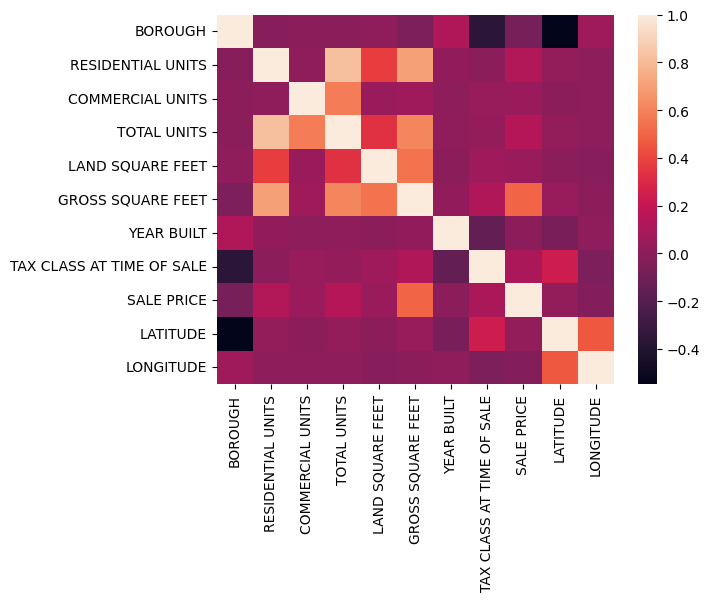

In [169]:
corr = df.corr()
sns.heatmap(corr)

In [170]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE                   1.000000
GROSS SQUARE FEET            0.493737
TOTAL UNITS                  0.137063
RESIDENTIAL UNITS            0.135415
TAX CLASS AT TIME OF SALE    0.109806
COMMERCIAL UNITS             0.046636
LAND SQUARE FEET             0.045962
LATITUDE                     0.025123
YEAR BUILT                  -0.004494
LONGITUDE                   -0.031307
BOROUGH                     -0.076202
Name: SALE PRICE, dtype: float64

In [171]:
fig = px.box(df, x='SALE PRICE')
fig.show()

In [172]:
df = df[df['SALE PRICE']<50000000]
df = df[df['SALE PRICE']>100000]

In [173]:
fig = px.box(df, x='SALE PRICE')
fig.show()

In [174]:
fig = px.box(df, x='GROSS SQUARE FEET')
fig.show()

In [175]:
df=df[df['GROSS SQUARE FEET']<=500000]

In [176]:
df.describe()

BOROUGH  RESIDENTIAL UNITS  COMMERCIAL UNITS   TOTAL UNITS  \
count  56344.000000       56344.000000      56344.000000  56344.000000   
mean       2.939532           1.533721          0.137814      1.678528   
std        1.330986           7.020311          9.917891     12.173210   
min        1.000000           0.000000          0.000000      0.000000   
25%        2.000000           0.000000          0.000000      0.000000   
50%        3.000000           1.000000          0.000000      1.000000   
75%        4.000000           2.000000          0.000000      2.000000   
max        5.000000         462.000000       2261.000000   2261.000000   

       LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count      5.634400e+04       56344.000000  56344.000000   
mean       3.471129e+03        3156.590551   1832.967610   
std        2.087366e+04        8558.030728    465.912276   
min        0.000000e+00           0.000000      0.000000   
25%        2.000000e+03        1320.000000   1920.000000   
50%        3.785000e+03        2550.000000   1940.000000   
75%        3.941000e+03        4045.000000   1967.000000   
max        3.014056e+06      486162.000000   2017.000000   

       TAX CLASS AT TIME OF SALE    SALE PRICE      LATITUDE     LONGITUDE  
count               56344.000000  5.634400e+04  56344.000000  56344.000000  
mean                    1.608885  1.258107e+06     40.710443    -73.931249  
std                     0.667527  2.583946e+06      0.079046      0.103838  
min                     1.000000  1.003350e+05     40.508500    -74.244500  
25%                     1.000000  4.030488e+05     40.658800    -73.985800  
50%                     2.000000  6.500000e+05     40.716600    -73.947500  
75%                     2.000000  1.100000e+06     40.762700    -73.850300  
max                     4.000000  4.821320e+07     40.904500    -73.682800

In [177]:
df=df[df['LAND SQUARE FEET']!=0]
df=df[df['GROSS SQUARE FEET']!=0]

In [178]:
fig = px.box(df, x='GROSS SQUARE FEET')
fig.show()

In [179]:
fig = px.histogram(df, x= 'GROSS SQUARE FEET' , nbins=3000, histnorm='probability density')
fig.show()

In [180]:
fig = px.box(df, x='LAND SQUARE FEET')
fig.show()

In [181]:
df=df[df['LAND SQUARE FEET']<400000]

In [182]:
df=df[df['YEAR BUILT']!=0]

In [183]:
fig = px.box(df, x='YEAR BUILT')
fig.show()

In [184]:
df = df[df['YEAR BUILT']>1800]

In [185]:
fig = px.scatter(df,x='TOTAL UNITS',y='SALE PRICE')
fig.show()

In [186]:
df = df[df['TOTAL UNITS']<500]

In [187]:
fig = px.box(df,x='COMMERCIAL UNITS')
fig.show()

In [188]:
df = df[df['COMMERCIAL UNITS']<150]

In [189]:
fig = px.box(df,x='RESIDENTIAL UNITS')
fig.show()

In [190]:
fig = px.scatter(df,x='LATITUDE',y='SALE PRICE')
fig.show()

In [191]:
fig = px.scatter(df,x='LONGITUDE',y='SALE PRICE')
fig.show()


In [192]:
perSquareRate = []
for index,rows in df.iterrows():
  rate = rows['SALE PRICE']/rows['GROSS SQUARE FEET']
  perSquareRate.append(rate)

In [193]:
fig = px.box(x=perSquareRate)
fig.show()

In [194]:
df = df.reset_index(drop=True)

In [195]:
dropIndex = []
for index,rows in df.iterrows():
  if rows['SALE PRICE']/rows['GROSS SQUARE FEET'] < 150:
    dropIndex.append(index)

df = df.drop(dropIndex, axis=0)
df = df.reset_index(drop=True)
df

BOROUGH                      BUILDING CLASS CATEGORY  \
0            1  07 RENTALS - WALKUP APARTMENTS                
1            1  07 RENTALS - WALKUP APARTMENTS                
2            1  07 RENTALS - WALKUP APARTMENTS                
3            1  07 RENTALS - WALKUP APARTMENTS                
4            1  08 RENTALS - ELEVATOR APARTMENTS              
...        ...                                          ...   
36186        5  02 TWO FAMILY DWELLINGS                       
36187        5  02 TWO FAMILY DWELLINGS                       
36188        5  02 TWO FAMILY DWELLINGS                       
36189        5  02 TWO FAMILY DWELLINGS                       
36190        5  22 STORE BUILDINGS                            

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT  RESIDENTIAL UNITS  \
0                       2A                        C2                  5   
1                       2B                        C4                 10   
2                       2A                        C2                  6   
3                       2B                        C4                  8   
4                        2                        D9                 24   
...                    ...                       ...                ...   
36186                    1                        B2                  2   
36187                    1                        B9                  2   
36188                    1                        B9                  2   
36189                    1                        B2                  2   
36190                    4                        K6                  0   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                     0            5            1633.0             6440.0   
1                     0           10            2272.0             6794.0   
2                     0            6            2369.0             4615.0   
3                     0            8            1750.0             4226.0   
4                     0           24            4489.0            18523.0   
...                 ...          ...               ...                ...   
36186                 0            2           11088.0             2160.0   
36187                 0            2            2400.0             2575.0   
36188                 0            2            2498.0             2377.0   
36189                 0            2            4000.0             1496.0   
36190                 7            7          208033.0            64117.0   

       YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0            1900                          2                             C2   
1            1913                          2                             C4   
2            1900                          2                             C2   
3            1920                          2                             C4   
4            1920                          2                             D9   
...           ...                        ...                            ...   
36186        1994                          1                             B2   
36187        1998                          1                             B9   
36188        1998                          1                             B9   
36189        1925                          1                             B2   
36190        2001                          4                             K6   

       SALE PRICE  LATITUDE  LONGITUDE  
0       6625000.0   40.7262   -73.9796  
1       3936272.0   40.7262   -73.9796  
2       8000000.0   40.7262   -73.9796  
3       3192840.0   40.7262   -73.9796  
4      16232000.0   40.7262   -73.9796  
...           ...       ...        ...  
36186    648000.0   40.5352   -74.2116  
36187    450000.0   40.5352   -74.2116  
36188    550000.0   40.5352   -74.2116  
36189    460000.0   40.5352   -74.2116  
36190  11693337.0   40.5

In [196]:
perSquareRate = []
for index,rows in df.iterrows():
  rate = rows['SALE PRICE']/rows['LAND SQUARE FEET']
  perSquareRate.append(rate)

In [197]:
fig = px.box(x=perSquareRate)
fig.show()

In [198]:
dropIndex = []
for index,rows in df.iterrows():
  if rows['SALE PRICE']/rows['LAND SQUARE FEET'] < 50:
    dropIndex.append(index)

df = df.drop(dropIndex, axis=0)
df = df.reset_index(drop=True)
df

BOROUGH                      BUILDING CLASS CATEGORY  \
0            1  07 RENTALS - WALKUP APARTMENTS                
1            1  07 RENTALS - WALKUP APARTMENTS                
2            1  07 RENTALS - WALKUP APARTMENTS                
3            1  07 RENTALS - WALKUP APARTMENTS                
4            1  08 RENTALS - ELEVATOR APARTMENTS              
...        ...                                          ...   
36014        5  02 TWO FAMILY DWELLINGS                       
36015        5  02 TWO FAMILY DWELLINGS                       
36016        5  02 TWO FAMILY DWELLINGS                       
36017        5  02 TWO FAMILY DWELLINGS                       
36018        5  22 STORE BUILDINGS                            

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT  RESIDENTIAL UNITS  \
0                       2A                        C2                  5   
1                       2B                        C4                 10   
2                       2A                        C2                  6   
3                       2B                        C4                  8   
4                        2                        D9                 24   
...                    ...                       ...                ...   
36014                    1                        B2                  2   
36015                    1                        B9                  2   
36016                    1                        B9                  2   
36017                    1                        B2                  2   
36018                    4                        K6                  0   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0                     0            5            1633.0             6440.0   
1                     0           10            2272.0             6794.0   
2                     0            6            2369.0             4615.0   
3                     0            8            1750.0             4226.0   
4                     0           24            4489.0            18523.0   
...                 ...          ...               ...                ...   
36014                 0            2           11088.0             2160.0   
36015                 0            2            2400.0             2575.0   
36016                 0            2            2498.0             2377.0   
36017                 0            2            4000.0             1496.0   
36018                 7            7          208033.0            64117.0   

       YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0            1900                          2                             C2   
1            1913                          2                             C4   
2            1900                          2                             C2   
3            1920                          2                             C4   
4            1920                          2                             D9   
...           ...                        ...                            ...   
36014        1994                          1                             B2   
36015        1998                          1                             B9   
36016        1998                          1                             B9   
36017        1925                          1                             B2   
36018        2001                          4                             K6   

       SALE PRICE  LATITUDE  LONGITUDE  
0       6625000.0   40.7262   -73.9796  
1       3936272.0   40.7262   -73.9796  
2       8000000.0   40.7262   -73.9796  
3       3192840.0   40.7262   -73.9796  
4      16232000.0   40.7262   -73.9796  
...           ...       ...        ...  
36014    648000.0   40.5352   -74.2116  
36015    450000.0   40.5352   -74.2116  
36016    550000.0   40.5352   -74.2116  
36017    460000.0   40.5352   -74.2116  
36018  11693337.0   40.5

In [200]:
print('SALE PRICE',df['SALE PRICE'].skew())
print('GROSS SQUARE FEET',df['GROSS SQUARE FEET'].skew())
print('LAND SQUARE FEET',df['LAND SQUARE FEET'].skew())
print('TOTAL UNITS',df['TOTAL UNITS'].skew())
print('RESIDENTIAL UNITS',df['RESIDENTIAL UNITS'].skew())
print('COMMERCIAL UNITS',df['COMMERCIAL UNITS'].skew())
print('LATITUDE',df['LATITUDE'].skew())
print('LONGITUDE',df['LONGITUDE'].skew())
print('YEAR BUILT',df['YEAR BUILT'].skew())



SALE PRICE 7.027329793375699
GROSS SQUARE FEET 17.182158078582944
LAND SQUARE FEET 24.874042189072682
TOTAL UNITS 15.164766549778038
RESIDENTIAL UNITS 15.72594946519851
COMMERCIAL UNITS 19.598796997824106
LATITUDE -0.09829448410964228
LONGITUDE -0.3510864663334126
YEAR BUILT 0.5677971522387293


1.2773103147005762


<ipython-input-202-3045048915fc>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='SALE PRICE', ylabel='Density'>

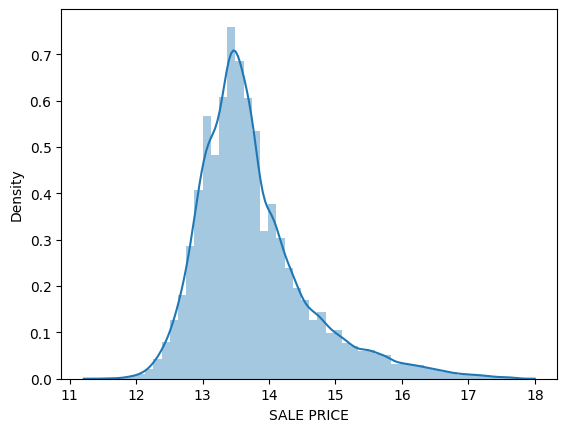

In [202]:
test_price=df['SALE PRICE']
price_norm=np.log(test_price)
print(price_norm.skew())
sns.distplot(price_norm)

0.8763488702429713


<ipython-input-203-64c34da47aa0>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GROSS SQUARE FEET', ylabel='Density'>

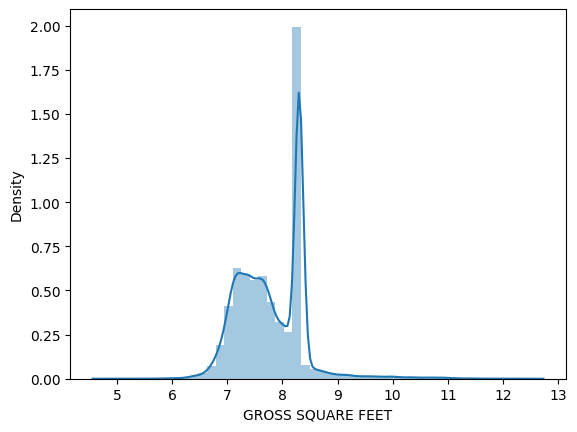

In [203]:
gross_test = df['GROSS SQUARE FEET']
gross_norm=(np.log(gross_test))
print(gross_norm.skew())
sns.distplot(gross_norm)

0.4373635904258988


<ipython-input-204-0f3bf65aa463>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='LAND SQUARE FEET', ylabel='Density'>

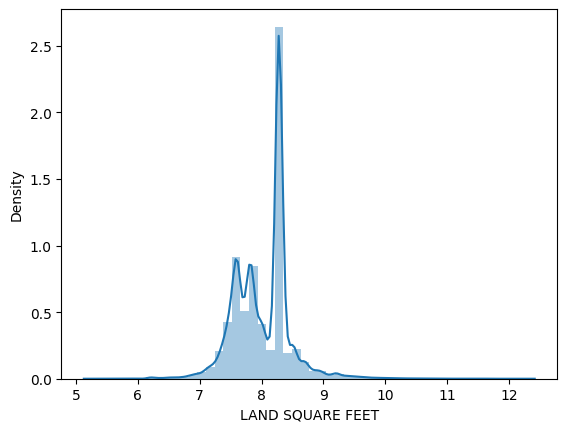

In [204]:
land_test = df['LAND SQUARE FEET']
land_norm=np.log(land_test)
print(land_norm.skew())
sns.distplot(land_norm)

1.1108037555876034


<ipython-input-205-f7f4a3bcf43a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='TOTAL UNITS', ylabel='Density'>

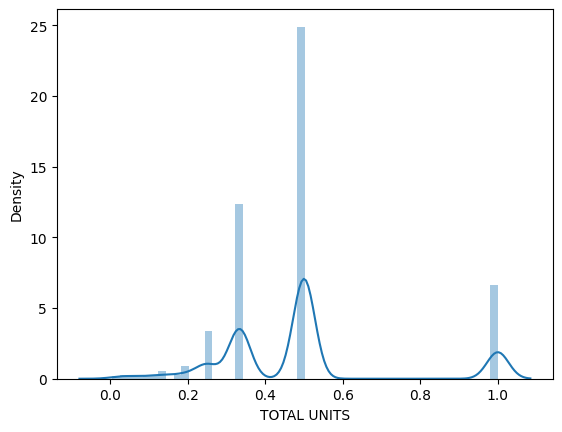

In [205]:
test_total_units=df['TOTAL UNITS'].astype('float64')
total_units_norm=1/(test_total_units+1)
print(total_units_norm.skew())
sns.distplot(total_units_norm)

-3.992535885747825


<ipython-input-214-6f0d567c185f>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='COMMERCIAL UNITS', ylabel='Density'>

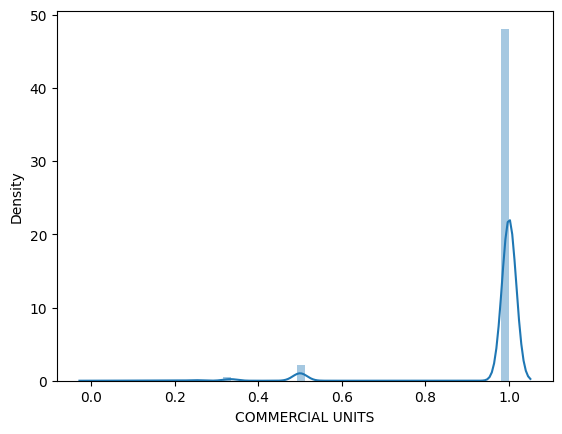

In [214]:
test_commercial_units=df['COMMERCIAL UNITS']
commercial_units_norm =(1/(test_commercial_units+1))
print(commercial_units_norm.skew())
sns.distplot(commercial_units_norm)

1.009660682743207


<ipython-input-207-062176bc6741>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='RESIDENTIAL UNITS', ylabel='Density'>

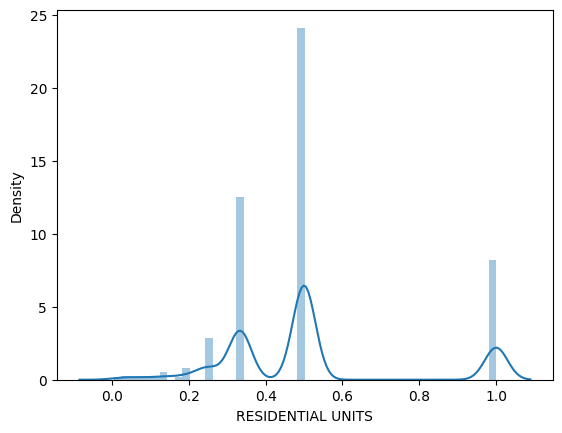

In [207]:
test_residential_unit = df['RESIDENTIAL UNITS']
residential_units_norm = 1/(test_residential_unit+1)
print(residential_units_norm.skew())
sns.distplot(residential_units_norm)

In [208]:
fig = px.scatter(df, x= commercial_units_norm ,y='SALE PRICE' )
fig.show()

In [209]:
fig = px.scatter(df, x='COMMERCIAL UNITS' ,y='SALE PRICE' )
fig.show()

In [210]:
fig = px.scatter(df, x= 'TOTAL UNITS' ,y='SALE PRICE' )
fig.show()

In [211]:
fig = px.scatter(df, x= total_units_norm ,y='SALE PRICE' )
fig.show()

In [215]:
def normalization (df):
  df['SALE PRICE'] = np.log(df['SALE PRICE'])
  df['GROSS SQUARE FEET'] = np.log(df['GROSS SQUARE FEET'])
  df['LAND SQUARE FEET'] = np.log(df['LAND SQUARE FEET'])
  df['RESIDENTIAL UNITS'] = 1/(df['RESIDENTIAL UNITS']+1)
  df['COMMERCIAL UNITS'] = 1/(df['COMMERCIAL UNITS']+1)
  df['TOTAL UNITS'] = 1/(df['TOTAL UNITS']+1)

  return df

In [216]:
df.to_csv(r'dataCleaned.csv',index=False)